# Example 9.4.1, Beaufait 1977
From, *Basic Concepts of Structural Analysis*, Beaufait, Fred W., Prentice-Hall, 1977.

In [1]:
from Frame2D import Frame2D
from Frame2D.Members import Member

In [2]:
# because units are kips, inches

Member.E = 30000.    #ksi
Member.G = 11500.

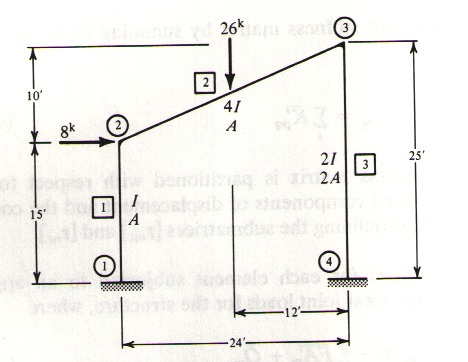

In [3]:
from IPython import display
display.Image('data/Beaufait-9-4-1.d/fig1.jpg')

In [4]:
frame = Frame2D('Beaufait-9-4-1')   # Example 9.4.1, p. 460
frame.input_all()
rs = frame.solve()
frame.print_input()
frame.print_results(rs,mult=[1.,1.,1./12.])


Frame Beaufait-9-4-1:


              # of nodal degrees of freedom: 12
  # of constrained nodal degrees of freedom: 6
# of unconstrained nodal degrees of freedom: 6  (= degree of kinematic indeterminacy)

                               # of members: 3
                             # of reactions: 6
                                 # of nodes: 4
                            # of conditions: 0
           degree of statical indeterminacy: 3



Nodes:

Node          X         Y  Constraints  DOF #s
----      -----     -----  -----------  ------
N1            0         0  FX,FY,MZ     6,7,8
N2            0       180               0,1,2
N3          288       300               3,4,5
N4          288         0  FX,FY,MZ     9,10,11



Members:

Member   Node-J  Node-K    Length       dcx       dcy  Size                Ix           A  Releases
------   ------  ------    ------   -------   -------  --------      --------       -----  --------
M1       N1      N2         180.0   0.00000   1.00000 

### Compare Solution Here with that in the Book

In [5]:
import pandas as pd
efs = [('M1',11.77,2.72,33.06,-11.77,-2.72,7.75),  # end forces from soln, Beaufait, p 473
       ('M2',9.40,8.85,-7.83,0.60,15.15,-74.11),
       ('M3',14.18,5.27,74.10,-14.18,-5.27,57.81)]
BOOK_MEFS = pd.DataFrame(efs,columns='ID,FXJ,FYJ,MZJ,FXK,FYK,MZK'.split(',')).set_index('ID')
BOOK_MEFS[['MZJ','MZK']] *= 12.   # convert ft-kips to in-kips
BOOK_MEFS

,FXJ,FYJ,MZJ,FXK,FYK,MZK
ID,,,,,,
M1,11.77,2.72,396.72,-11.77,-2.72,93.00
M2,9.40,8.85,-93.96,0.60,15.15,-889.32
M3,14.18,5.27,889.20,-14.18,-5.27,693.72


In [6]:
HERE_MEFS = pd.DataFrame(frame.list_member_end_forces(rs),
                         columns='ID,FXJ,FYJ,MZJ,FXK,FYK,MZK'.split(',')).set_index('ID')
HERE_MEFS

,FXJ,FYJ,MZJ,FXK,FYK,MZK
ID,,,,,,
M1,11.787008,2.723643,396.897076,-11.787008,-2.723643,93.358711
M2,9.403948,8.850947,-93.358711,0.596052,15.149053,-889.145838
M3,14.212992,5.276357,889.145838,-14.212992,-5.276357,693.761182


In [7]:
pdiff = (100*(HERE_MEFS-BOOK_MEFS)/BOOK_MEFS)
pdiff.round(2)

,FXJ,FYJ,MZJ,FXK,FYK,MZK
ID,,,,,,
M1,0.14,0.13,0.04,0.14,0.13,0.39
M2,0.04,0.01,-0.64,-0.66,-0.01,-0.02
M3,0.23,0.12,-0.01,0.23,0.12,0.01


Max difference is 0.66%